In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
%watermark

Last updated: 2024-06-25T23:30:47.780808-04:00

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.22.2

Compiler    : MSC v.1937 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 167 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [3]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline
%watermark -w
%watermark -iv

Watermark: 2.4.3

numpy     : 1.26.4
seaborn   : 0.13.2
matplotlib: 3.8.3
pandas    : 2.2.1
geopandas : 0.14.3



In [4]:
sns.set_style('ticks')

warnings.filterwarnings('ignore')

# 1. Contexto

O **Enem** (Exame Nacional do Ensino Medio) e uma prova realizada pelo **INEP** (Instituto Nacional de Estudos e Pesquisas Educacionais Anisio Teixeira) e seu resultado pode ser utilizado para a admissao ao ensino superior, permitindo ao aluno concorrer a bolsas e financiamentos estudantis.
A prova e realizada em dois dias, sendo o primeiro dia com provas de Linguagens, Codigos e suas Tecnologias, Ciencias Humanas e suas Tecnologias e Redacao; no segundo dia sao realizados os exames de Ciencias da Natureza e suas Tecnologias e Matematica e suas Tecnologias.

# 2. Objetivo

- Avaliar, de acordo com o perfil do participante, se o candidato ira faltar no dia do exame.

  - Identificar se o aluno ira faltar pode ser benefico para:
      - Definir politicas que reduzam a taxa de falta para perfis que apresentem maior tendencia de nao comparecimento;
      - Melhorar o dimensionamento da quantidade de profissionais que irao atuar no dia do exame e na otimizacao de espacos fisicos para a realizacao das provas.

Para a avaliacao, como a base e muito grande e tenho limitacao computacional, irei utilizar uma amostra dos dados de 2023 para treinar e testar o modelo.    

**Sugestao**: para trabalhos mais robustos e utilizar as bases de periodos anteriores, por exemplo de 2012 a 2022, para treinar o modelo e a base de 2023 para testa-lo.

# 3. Dados

In [6]:
# Data

data = pd.read_csv("D:/OneDrive/PROJETOS_R_GIT/2024/ENEM/microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv", encoding='latin', sep = ';')

In [7]:
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


## 3.1. Conhecendo a base de dados

In [8]:
print(f'A base possui {data.shape[0]} linhas e {data.shape[1]} colunas.')

A base possui 3933955 linhas e 76 colunas.


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933955 entries, 0 to 3933954
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [10]:
# Selecao das colunas de interesse

colunas1 = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
           'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
           'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
           'CO_MUNICIPIO_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
           ]

colunas2 = data.loc[:,'Q001':'Q025'].columns.to_list()
colunas3 = colunas1 + colunas2

data_tmp2 = data[colunas3]

In [ ]:
data_tmp2.head()

In [13]:
data_na = pd.DataFrame(data_tmp2.isna().sum().sort_values(), columns=['qtde'])
data_na['proporcao'] = data_na['qtde']/data_tmp2.shape[0] * 100
#print(data_na.to_string())
data_na

,qtde,proporcao
NU_INSCRICAO,0,0.000
Q006,0,0.000
Q007,0,0.000
Q008,0,0.000
Q009,0,0.000
Q010,0,0.000
Q011,0,0.000
Q012,0,0.000
Q013,0,0.000
Q005,0,0.000


- As variaveis **'TP_ENSINO'**, **'TP_DEPENDENCIA_ADM_ESC'** e **'TP_LOCALIZACAO_ESC'** possuem mais de 60% de valores 'NA' e nao serao utilizadas.

In [ ]:
# print(data_tmp2.head())
print(f'O novo dataset possui {data_tmp2.shape[0]} linhas e {data_tmp2.shape[1]} colunas.')

## 3.2. Analisando a variavel de interesse - Falta e Presenca

Como a prova e realizada em dois dias, inicialmente, irei avaliar se os alunos 'faltaram' a alguma prova no mesmo dia e depois, se o aluno faltou no primeiro dia tambem faltou no segundo.


In [15]:
# No primeiro dia ocorre a prova de Linguagens, Ciencias Humanas e Redacao

colunas_ch_lc = ['TP_PRESENCA_CH', 'TP_PRESENCA_LC']
data_ch_lc = data_tmp2[colunas_ch_lc]

tabela_ch_lc = pd.pivot_table(data_ch_lc, index='TP_PRESENCA_CH', columns = 'TP_PRESENCA_LC', aggfunc='size',fill_value=0)
tabela_ch_lc = tabela_ch_lc / tabela_ch_lc.sum().sum()
tabela_ch_lc

TP_PRESENCA_LC,0,1,2
TP_PRESENCA_CH,,,
0,0.281,0.000,0.000
1,0.000,0.718,0.000
2,0.000,0.000,0.001


- Considerando as provas de Linguagens e Ciencias Humanas, quem faltou ao primeiro dia em uma das provas tambem nao realizou a outra.    
  
Importante: Caso o aluno nao entre no horario de inicio das provas, ele e considerado como ausente em todas do dia.

In [16]:
colunas_cn_ch = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH']
data_cn_ch = data_tmp2[colunas_cn_ch]

tabela_cn_ch = pd.pivot_table(data_cn_ch, index = 'TP_PRESENCA_CN', columns = 'TP_PRESENCA_CH', aggfunc='size')
tabela_cn_ch_prop =  tabela_cn_ch / tabela_cn_ch.sum()
tabela_cn_ch_prop

TP_PRESENCA_CH,0,1,2
TP_PRESENCA_CN,,,
0,0.988,0.050,0.843
1,0.012,0.949,0.157
2,0.000,0.001,0.000


Analisando os dados de dois dias diferentes de prova, se o aluno faltou no primeiro dia, provavelmente ele ira faltar no segundo dia.
- As proporcoes de alunos que faltaram no primeiro dia e foram no segundo dia e muito baixa.
- A ausencia de alunos no segundo dia, dado que ele esteve presente no primeiro tambem e baixa.

Por isso, sera considerado aluno faltante aquele que faltou no primeiro dia de prova. Caso o aluno tenha sido eliminado da prova, ele e considerado como 'nao faltante'.

In [17]:
# Criando a variavel de interesse a partir das variaveis de presenca

def faltou(coluna1):
    if coluna1 == 1 or coluna1 == 2:
        return 'present'
    else:
        return 'falta'

data_tmp2['target'] = data_tmp2['TP_PRESENCA_CN'].apply(faltou)

data_tmp2.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,target
0,210059085136,14,M,2,1,1,1,17,1,NaN,...,C,B,B,A,B,B,A,A,B,falta
1,210059527735,12,M,2,1,0,1,16,1,NaN,...,A,B,B,A,A,C,A,D,B,falta
2,210061103945,6,F,1,1,1,1,0,1,NaN,...,A,A,B,A,A,A,A,A,B,present
3,210060214087,2,F,1,3,1,2,0,2,1.000,...,A,A,B,A,A,D,A,A,B,present
4,210059980948,3,F,1,3,1,2,0,2,1.000,...,A,A,B,A,A,B,A,A,A,present


In [18]:
# Verificando a nova variavel criada

colunas_target = ['target', 'TP_PRESENCA_CN']
data_target = data_tmp2[colunas_target]

tabela_target = pd.pivot_table(data_target, index = 'target', columns = 'TP_PRESENCA_CN', aggfunc='size', fill_value=0)

tabela_target_prop = tabela_target.div(tabela_target.sum(axis = 1), axis = 0)
tabela_target_prop

TP_PRESENCA_CN,0,1,2
target,,,
falta,1.000,0.000,0.000
present,0.000,0.999,0.001


In [19]:
# Removendo as colunas de faltas por prova
colunas_to_remove = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']

data_tmp2.drop(colunas_to_remove, axis = 1, inplace=True)

# 4. Analise Exploratoria - Univariada

In [20]:
data_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933955 entries, 0 to 3933954
Data columns (total 41 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   TP_FAIXA_ETARIA         int64  
 2   TP_SEXO                 object 
 3   TP_ESTADO_CIVIL         int64  
 4   TP_COR_RACA             int64  
 5   TP_NACIONALIDADE        int64  
 6   TP_ST_CONCLUSAO         int64  
 7   TP_ANO_CONCLUIU         int64  
 8   TP_ESCOLA               int64  
 9   TP_ENSINO               float64
 10  IN_TREINEIRO            int64  
 11  CO_MUNICIPIO_ESC        float64
 12  TP_DEPENDENCIA_ADM_ESC  float64
 13  TP_LOCALIZACAO_ESC      float64
 14  CO_MUNICIPIO_PROVA      int64  
 15  Q001                    object 
 16  Q002                    object 
 17  Q003                    object 
 18  Q004                    object 
 19  Q005                    int64  
 20  Q006                    object 
 21  Q007                    object 

In [21]:
## Faixa Etaria

age_categories = {
    1: "Menor de 17 anos",
    2: "17 anos",
    3: "18 anos",
    4: "19 anos",
    5: "20 anos",
    6: "21 anos",
    7: "22 anos",
    8: "23 anos",
    9: "24 anos",
    10: "25 anos",
    11: "Entre 26 e 30 anos",
    12: "Entre 31 e 35 anos",
    13: "Entre 36 e 40 anos",
    14: "Entre 41 e 45 anos",
    15: "Entre 46 e 50 anos",
    16: "Entre 51 e 55 anos",
    17: "Entre 56 e 60 anos",
    18: "Entre 61 e 65 anos",
    19: "Entre 66 e 70 anos",
    20: "Maior de 70 anos"
}

dados_faixa_etaria = data_tmp2['TP_FAIXA_ETARIA'].map(age_categories)
dados_faixa_etaria2 = dados_faixa_etaria.value_counts().reset_index()
dados_faixa_etaria2.columns = ['Faixa Etaria', 'qtde']

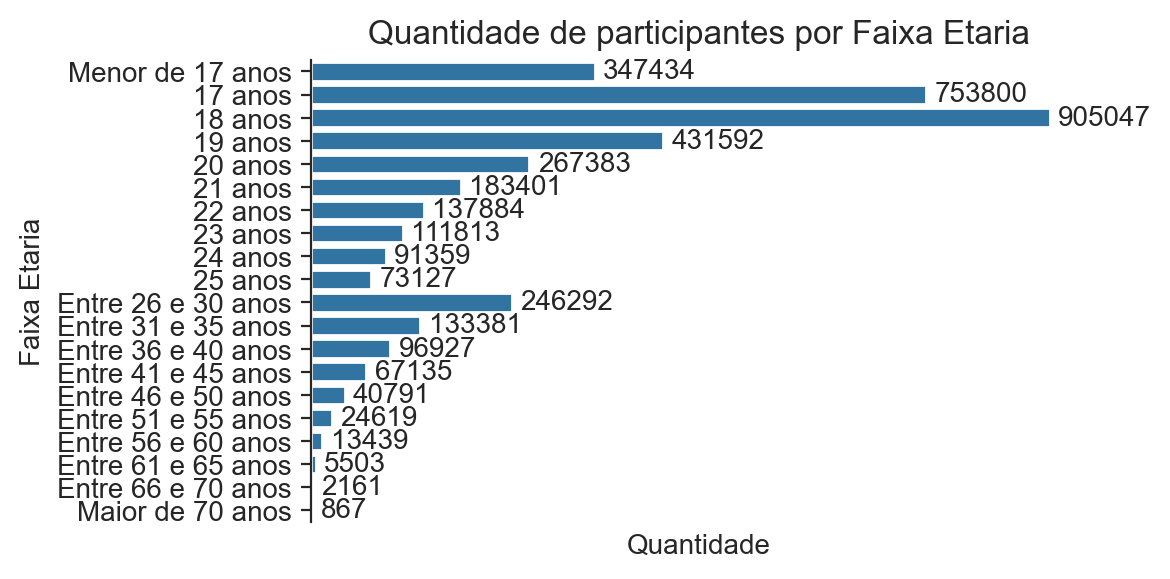

In [22]:
# Barplot

plt.figure(figsize=(5,3))

ordenacao_faixas = [age_categories[i] for i in range(1,21)]
ax = sns.barplot(
    y = 'Faixa Etaria',
    x = 'qtde',
    data = dados_faixa_etaria2,
    order=ordenacao_faixas
)

for i in ax.containers:
    ax.bar_label(i, fmt = '%d', label_type='edge', padding=3)

plt.title('Quantidade de participantes por Faixa Etaria')
plt.xlabel('Quantidade')
plt.ylabel('Faixa Etaria')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])

plt.show()

- A maior parcela dos participantes possuem 18 anos, seguido dos participantes com 17 anos.

In [23]:
# Sexo

dados_sexo = data_tmp2['TP_SEXO'].value_counts().reset_index()
dados_sexo.columns = ['TP_SEXO', 'QTDE']
dados_sexo

proporcao_feminino = dados_sexo[dados_sexo['TP_SEXO'] == 'F']['QTDE'].iloc[0] / dados_sexo['QTDE'].sum()

print(f'A proporção de feminino (F) é: {proporcao_feminino:.2%}')

A proporção de feminino (F) é: 61.29%


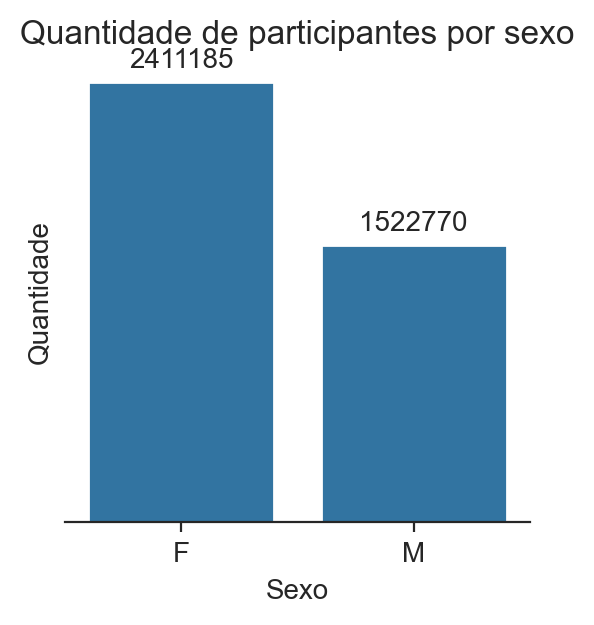

In [25]:
# Barplot
plt.figure(figsize=(3,3))

ax = sns.barplot(
    x = 'TP_SEXO',
    y = 'QTDE',
    data = dados_sexo
)

for i in ax.containers:
    ax.bar_label(i, fmt = '%d', label_type='edge', padding=3)

plt.title('Quantidade de participantes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks([])
plt.show()

In [26]:
# Estado Civil
estado_civil_cat = {
    0:'Nao informado',
    1:'Solteiro(a)',
    2:'Casado(a)/Mora com companheiro(a)',
    3:'Divorciado(a)/Desquitado(a)/Separado(a)',
    4:'Viuvo(a)'
}


dados_estado_civil = data_tmp2['TP_ESTADO_CIVIL'].map(estado_civil_cat)
dados_estado_civil = dados_estado_civil.value_counts().reset_index()
dados_estado_civil.columns = ['Estado Civil', 'QTDE']

In [27]:
dados_estado_civil['PROP'] = (dados_estado_civil['QTDE']/dados_estado_civil['QTDE'].sum())*100
dados_estado_civil

,Estado Civil,QTDE,PROP
0,Solteiro(a),3491857,88.762
1,Casado(a)/Mora com companheiro(a),200456,5.096
2,Nao informado,171900,4.370
3,Divorciado(a)/Desquitado(a)/Separado(a),64933,1.651
4,Viuvo(a),4809,0.122


In [28]:
# Cor/Raca

raca_cor_cat = {
    0:'Nao declarado',
    1:'Branca',
    2:'Preta',
    3:'Parda',
    4:'Amarela',
    5:'Indigena',
    6:'Nao dispoe da informacao'
}

dados_cor_raca = data_tmp2['TP_COR_RACA'].map(raca_cor_cat)
dados_cor_raca = dados_cor_raca.value_counts().reset_index()
dados_cor_raca.columns = ['Cor_Raca', 'QTDE']


dados_cor_raca['PROP'] = (dados_cor_raca['QTDE']/dados_cor_raca['QTDE'].sum())*100
dados_cor_raca

,Cor_Raca,QTDE,PROP
0,Parda,1706798,43.386
1,Branca,1575848,40.058
2,Preta,509511,12.952
3,Amarela,64512,1.640
4,Nao declarado,52575,1.336
5,Indigena,24711,0.628


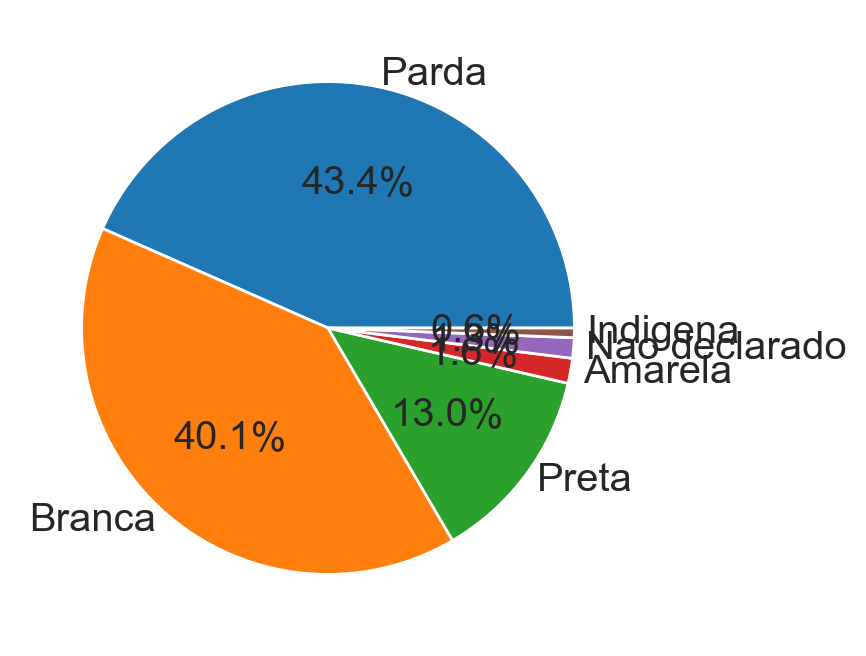

In [34]:
plt.figure(figsize=(4,4))
plt.pie(dados_cor_raca['QTDE'], labels = dados_cor_raca['Cor_Raca'], labeldistance=1.05,
        autopct='%.1f%%', wedgeprops={'linewidth':1.0, 'edgecolor':'white'},
        textprops={'size':'x-large'})
plt.show()

- Aproximadamente 85% dos participantes se declaram Brancos ou Pardos.
- 13% se declaram Pretos
- Menos de 2% se declaram Amarelos ou Indigenas

In [35]:
# Nacionalidade

nacionalidade_cat = {
    0: 'Não informado',
    1: 'Brasileiro(a)',
    2: 'Brasileiro(a) Naturalizado(a)',
    3: 'Estrangeiro(a)',
    4: 'Brasileiro(a) Nato(a), nascido(a) no exterior'

}

nacionalidade = data_tmp2[['TP_NACIONALIDADE', 'target']]
nacionalidade['classe'] = data_tmp2['TP_NACIONALIDADE'].map(nacionalidade_cat)
nacionalidade.groupby(['target','classe']).size().reset_index(name='counts')


,target,classe,counts
0,falta,Brasileiro(a),1208413
1,falta,"Brasileiro(a) Nato(a), nascido(a) no exterior",2193
2,falta,Brasileiro(a) Naturalizado(a),25468
3,falta,Estrangeiro(a),2346
4,falta,Não informado,896
5,present,Brasileiro(a),2634268
6,present,"Brasileiro(a) Nato(a), nascido(a) no exterior",6387
7,present,Brasileiro(a) Naturalizado(a),47961
8,present,Estrangeiro(a),4766
9,present,Não informado,1257


In [36]:
nac1 = nacionalidade.pivot_table(index='target', columns='classe', aggfunc='sum')
nac_prop = nac1.div(nac1.sum(axis=1), axis=0)
nac_prop

TP_NACIONALIDADE                                                \
classe     Brasileiro(a) Brasileiro(a) Nato(a), nascido(a) no exterior   
target                                                                   
falta              0.948                                         0.007   
present            0.951                                         0.009   

                                                                    
classe  Brasileiro(a) Naturalizado(a) Estrangeiro(a) Não informado  
target                                                              
falta                           0.040          0.006         0.000  
present                         0.035          0.005         0.000

- A maior parcela de alunos sao 'Brasileiros'.
- A proporcao entre faltantes e presente para cada nacionalidade e muito similar.
- Para o modelo, essa variavel sera desconsiderada.

In [37]:
# Situacao de conclusao do ensino medio

conclusao_cat = {
    1: 'Já concluí o Ensino Médio',
    2: 'Estou cursando e concluirei o Ensino Médio em 2023',
    3: 'Estou cursando e concluirei o Ensino Médio após 2023',
    4: 'Não concluí e não estou cursando o Ensino Médio'
}

data_conclusao = data_tmp2['TP_ST_CONCLUSAO'].map(conclusao_cat)
data_conclusao = data_conclusao.value_counts().reset_index()
data_conclusao.columns = ['TP_ST_CONCLUSAO', 'QTDE']

data_conclusao['PROP'] = data_conclusao['QTDE']/data_conclusao['QTDE'].sum()*100
data_conclusao

,TP_ST_CONCLUSAO,QTDE,PROP
0,Já concluí o Ensino Médio,1895301,48.178
1,Estou cursando e concluirei o Ensino Médio em ...,1401164,35.617
2,Estou cursando e concluirei o Ensino Médio apó...,620067,15.762
3,Não concluí e não estou cursando o Ensino Médio,17423,0.443


In [38]:
# Ano de Conclusao do Ensino Medio

ano_categories = {
    0: 'Não informado',
    1: '2022',
    2: '2021',
    3: '2020',
    4: '2019',
    5: '2018',
    6: '2017',
    7: '2016',
    8: '2015',
    9: '2014',
    10: '2013',
    11: '2012',
    12: '2011',
    13: '2010',
    14: '2009',
    15: '2008',
    16: '2007',
    17: 'Antes de 2007'
}

data_ano_conclusao = data_tmp2['TP_ANO_CONCLUIU'].map(ano_categories)
tabela_ano_conclusao = data_ano_conclusao.value_counts().reset_index()
tabela_ano_conclusao.columns = ['ANO_CONCLUSAO', 'QTDE']

tabela_ano_conclusao['ANO_CONCLUSAO'] = pd.Categorical(
    tabela_ano_conclusao['ANO_CONCLUSAO'],
    categories=[ano_categories[i] for i in range(18)],
    ordered=True
)

tabela_ano_conclusao = tabela_ano_conclusao.sort_values('ANO_CONCLUSAO')

tabela_ano_conclusao

,ANO_CONCLUSAO,QTDE
0,Não informado,2243134
1,2022,418530
2,2021,264183
4,2020,149798
5,2019,136449
6,2018,104195
7,2017,85411
8,2016,65549
9,2015,54769
10,2014,46654


In [39]:
# Avaliando as variaveis 'Situacao de conclusao' e 'Ano de Conclusao do Ensino Medio'

situacao_ano = data_tmp2[['TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU']]
situacao_ano['CAT_TP_ST_CONCLUSAO'] = situacao_ano['TP_ST_CONCLUSAO'].map(conclusao_cat)
situacao_ano['CAT_TP_ANO_CONCLUIU'] = situacao_ano['TP_ANO_CONCLUIU'].map(ano_categories)

tabela_resumo_data_conclusao = situacao_ano.groupby(['CAT_TP_ST_CONCLUSAO', 'CAT_TP_ANO_CONCLUIU']).size().reset_index()
tabela_resumo_data_conclusao.columns = ['CAT_TP_ST_CONCLUSAO', 'CAT_TP_ANO_CONCLUIU', 'QTDE']
tabela_resumo_data_conclusao['PROP'] = tabela_resumo_data_conclusao['QTDE']/tabela_resumo_data_conclusao['QTDE'].sum() * 100
tabela_resumo_data_conclusao

,CAT_TP_ST_CONCLUSAO,CAT_TP_ANO_CONCLUIU,QTDE,PROP
0,Estou cursando e concluirei o Ensino Médio apó...,Não informado,620067,15.762
1,Estou cursando e concluirei o Ensino Médio em ...,Não informado,1401164,35.617
2,Já concluí o Ensino Médio,2007,20471,0.520
3,Já concluí o Ensino Médio,2008,20998,0.534
4,Já concluí o Ensino Médio,2009,24639,0.626
5,Já concluí o Ensino Médio,2010,27421,0.697
6,Já concluí o Ensino Médio,2011,29001,0.737
7,Já concluí o Ensino Médio,2012,35512,0.903
8,Já concluí o Ensino Médio,2013,39920,1.015
9,Já concluí o Ensino Médio,2014,46654,1.186


- 35% dos participantes estao cursando o ensino medio e possuem previsao de formatura para 2023, permitindo inferir o ano de conclusao sendo 2023.
- 15% dos participantes estao cursando o ensino medio e nao possuem previsao de formatura para 2023. Uma alternativa para completar a informacao sera a inclusao do ano 2024.
- Menos de 0.5% nao concluiram e nao estao cursando o ensino medio
- 5.6% ja concluiram o ensino medio e nao informaram o ano de conclusao.

Para as duas variaveis, avaliar a criacao de uma nova variavel:
    - Alternativa 1: incluir o ano de 2023 e 2024; para os alunos que concluiram antes de 2007 ou que concluiram e nao informaram, incluir 2006.
    - Incluir uma nova variavel com os anos de 2023, 2024, 2022 e anterior a 2022.

In [40]:
# Tipo de escola do ensino medio

tp_escola_categoria = {
    1:'Nao respondeu',
    2: 'Publica',
    3: 'Privada'
}


dados_tp_escola = data_tmp2['TP_ESCOLA'].map(tp_escola_categoria)
dados_tp_escola = dados_tp_escola.value_counts().reset_index()
dados_tp_escola['PROP'] = dados_tp_escola['count']/dados_tp_escola['count'].sum()*100


dados_tp_escola


,TP_ESCOLA,count,PROP
0,Nao respondeu,2532796,64.383
1,Publica,1166540,29.653
2,Privada,234619,5.964


- 65% dos participantes nao responderam o tipo de escola do ensino medio.
- Remover a variavel.

In [41]:
# TREINEIRO 

treineiro_cat = {
    1: 'Sim',
    0: 'Nao'
}

dados_in_treineiro = data_tmp2['IN_TREINEIRO'].map(treineiro_cat)
dados_in_treineiro = dados_in_treineiro.value_counts().reset_index()
dados_in_treineiro.columns = ['IN_TREINEIRO', 'QTDE']

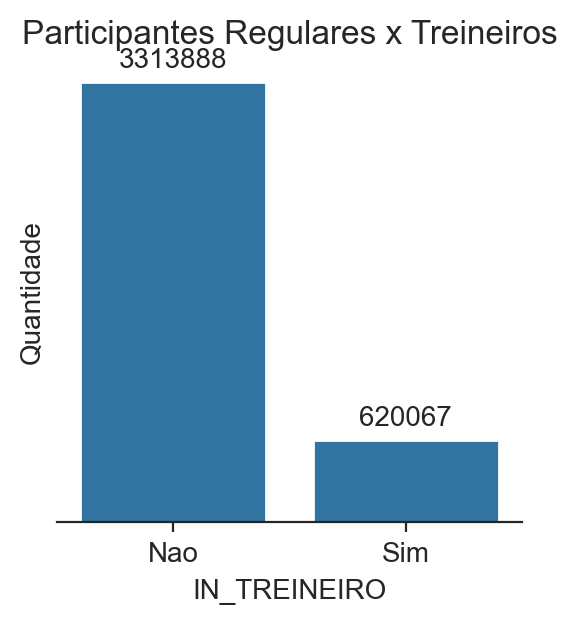

In [42]:
# Barplot

plt.figure(figsize=(3,3))

ax = sns.barplot(
    x = 'IN_TREINEIRO',
    y = 'QTDE',
    data = dados_in_treineiro
)

for i in ax.containers:
    ax.bar_label(i, fmt = '%d', label_type='edge', padding=3)

plt.title('Participantes Regulares x Treineiros')
plt.xlabel('IN_TREINEIRO')
plt.ylabel('Quantidade')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks([])
plt.show()

plt.show()

In [43]:
dados_in_treineiro['PROP'] = dados_in_treineiro['QTDE']/dados_in_treineiro['QTDE'].sum()
dados_in_treineiro

,IN_TREINEIRO,QTDE,PROP
0,Nao,3313888,0.842
1,Sim,620067,0.158


- 84% dos participantes nao sao alunos treineiros.

'Foi considerado treineiro o inscrito que não havia concluído o ensino médio e não o concluiria em 2023'

### 4.1. Dados do Questionario Socioeconomico

In [44]:
# Até que série seu pai, ou o homem responsável por você, estudou?

educacao_pais = {
    'H': 'Não sei.',
    'A': 'Nunca estudou.',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.'
    
}

educacao_pai = data_tmp2['Q001'].map(educacao_pais)
educacao_pai = educacao_pai.value_counts().reset_index()
educacao_pai.columns = ['Q001', 'QTDE']
educacao_pai['PROP'] = educacao_pai['QTDE']/educacao_pai['QTDE'].sum()*100

categories = list(educacao_pais.values())

educacao_pai['Q001'] = pd.Categorical(
    educacao_pai['Q001'],
    categories=categories,
    ordered=True
)

educacao_pai = educacao_pai.sort_values('Q001')

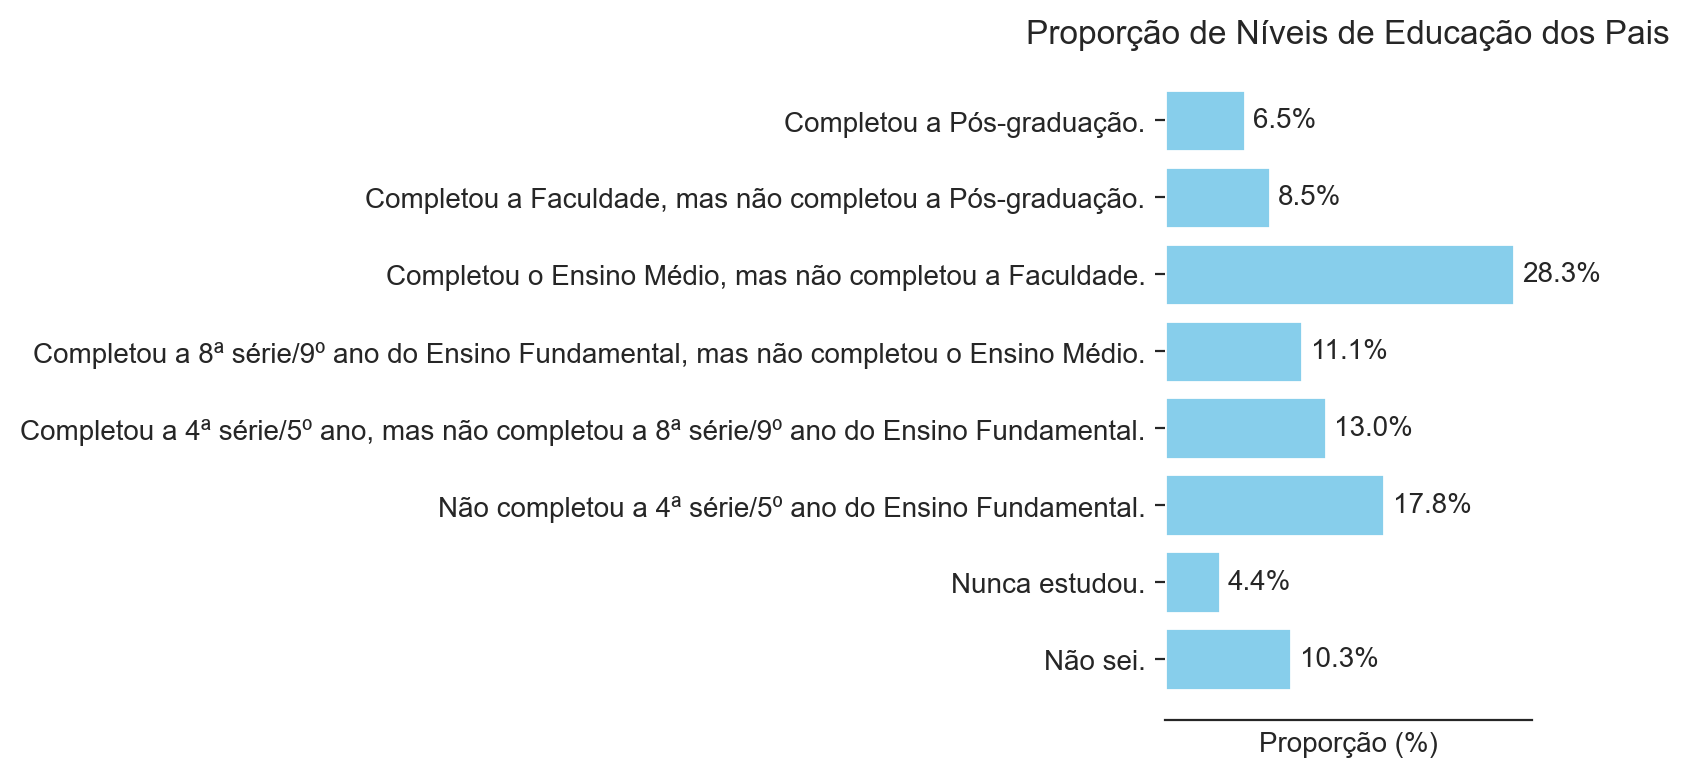

In [46]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(educacao_pai['Q001'], educacao_pai['PROP'], color='skyblue')
ax.set_xlabel('Proporção (%)')
# ax.set_ylabel('Nível de Educação - Pai')
ax.set_title('Proporção de Níveis de Educação dos Pais')

for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', label_type='edge', padding=3)

# Customizing the plot's appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])

plt.tight_layout()
plt.show()

In [47]:
# NIvel Educacional - Mae

educacao_mae = data_tmp2['Q002'].map(educacao_pais)
educacao_mae = educacao_mae.value_counts().reset_index()
educacao_mae.columns = ['Q002', 'QTDE']
educacao_mae['PROP'] = educacao_mae['QTDE']/educacao_mae['QTDE'].sum()*100

categories = list(educacao_pais.values())

educacao_mae['Q002'] = pd.Categorical(
    educacao_mae['Q002'],
    categories=categories,
    ordered=True
)

educacao_mae

,Q002,QTDE,PROP
0,"Completou o Ensino Médio, mas não completou a ...",1377605,35.018
1,Não completou a 4ª série/5º ano do Ensino Fund...,505525,12.850
2,Completou a 8ª série/9º ano do Ensino Fundamen...,473854,12.045
3,"Completou a Faculdade, mas não completou a Pós...",455268,11.573
4,Completou a Pós-graduação.,441893,11.233
5,"Completou a 4ª série/5º ano, mas não completou...",437022,11.109
6,Não sei.,131957,3.354
7,Nunca estudou.,110831,2.817


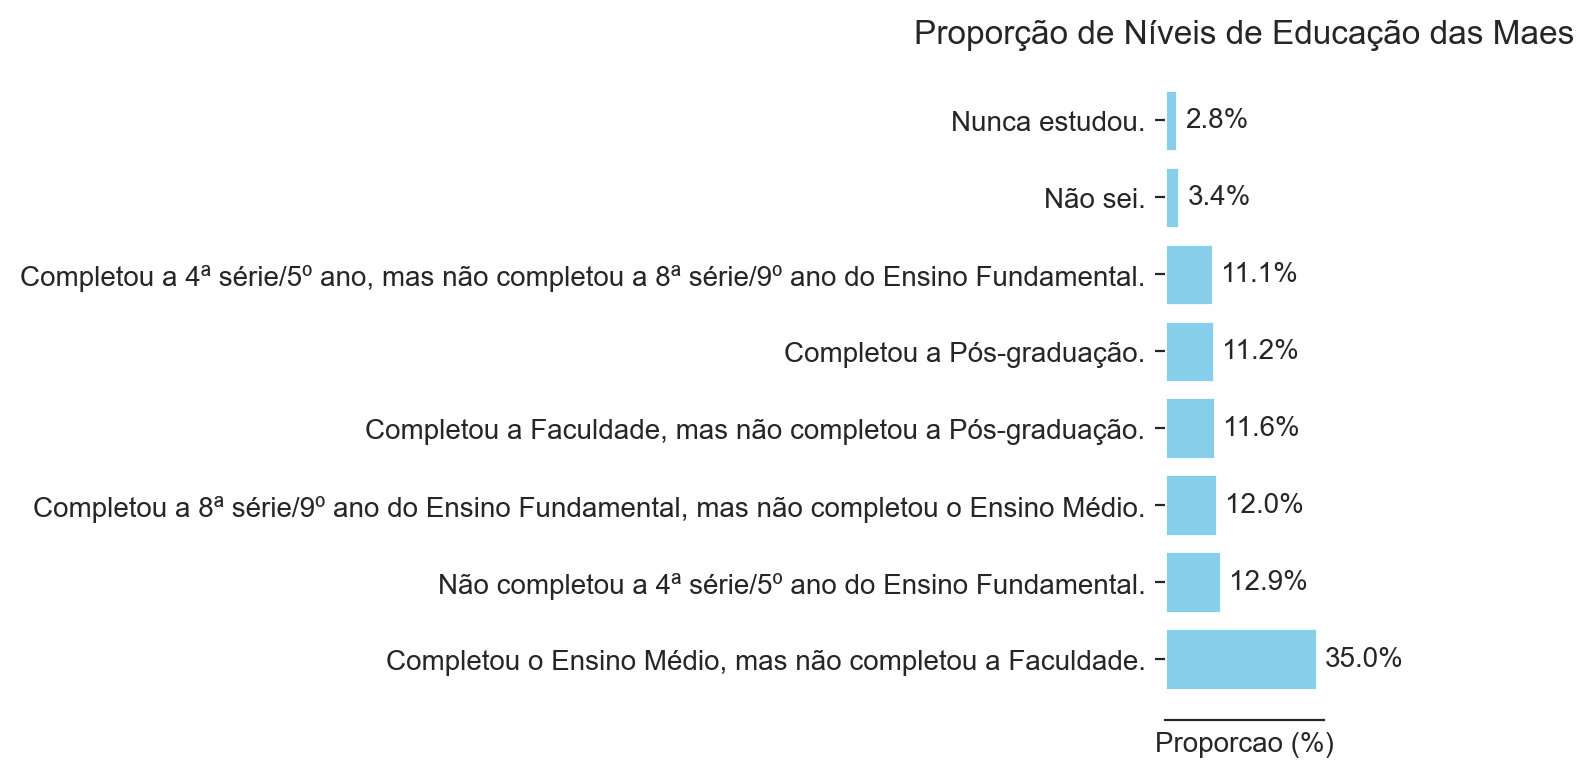

In [48]:
fig, ax = plt.subplots(figsize = (7,4))
ax.barh(educacao_mae['Q002'], educacao_mae['PROP'], color = 'skyblue')
ax.set_xlabel('Proporcao (%)')
ax.set_title('Proporção de Níveis de Educação das Maes')

for i in ax.containers:
    ax.bar_label(i, fmt = '%.1f%%', label_type='edge', padding=3)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])

plt.tight_layout()
plt.show()

In [49]:
#Q003 - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem 
# responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).

profissao_pai =  data_tmp2['Q003'].value_counts().reset_index().sort_values('count', ascending=False)
profissao_pai['prop'] = profissao_pai['count']/profissao_pai['count'].sum()*100
profissao_pai

,Q003,count,prop
0,C,911756,23.177
1,B,790173,20.086
2,A,750778,19.085
3,D,706775,17.966
4,F,506281,12.870
5,E,268192,6.817


- A	Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.
- B	Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.
- C	Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.
- D	Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.
- E	Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
- F	Não sei.

- Para os pais, a maior proporcao esta no grupo C, seguido pelos grupos B e A.
- O grupo com menor numero de participantes pertence aos pais do grupo 5 (Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados)
- Nao ha um grupo com proporcao que destaca-se significativamente por ser superior as demais.

In [50]:
#Q004 - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu mae ou da 
# mulher responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).

profissao_mae =  data_tmp2['Q004'].value_counts().reset_index().sort_values('count', ascending=False)
profissao_mae['prop'] = profissao_mae['count']/profissao_mae['count'].sum()*100
profissao_mae

,Q004,count,prop
0,B,1632671,41.502
1,D,892420,22.685
2,A,608127,15.458
3,F,352995,8.973
4,C,247158,6.283
5,E,200584,5.099


- Em relacao as maes, o grupo B (Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria) representa mais de 40% dos inscritos, quase o dobro do segundo maior grupo.

In [51]:
# Q005 - Incluindo você, quantas pessoas moram atualmente em sua residência?

pessoas_compar_residencia = data_tmp2['Q005'].value_counts().reset_index().sort_values(by = 'Q005', ascending=True)
pessoas_compar_residencia['PROP'] = pessoas_compar_residencia['count']/pessoas_compar_residencia['count'].sum()*100


pessoas_compar_residencia

,Q005,count,PROP
5,1,146875,3.734
2,2,567635,14.429
1,3,1086674,27.623
0,4,1247259,31.705
3,5,566325,14.396
4,6,194132,4.935
6,7,71049,1.806
7,8,29968,0.762
8,9,11192,0.284
9,10,6826,0.174


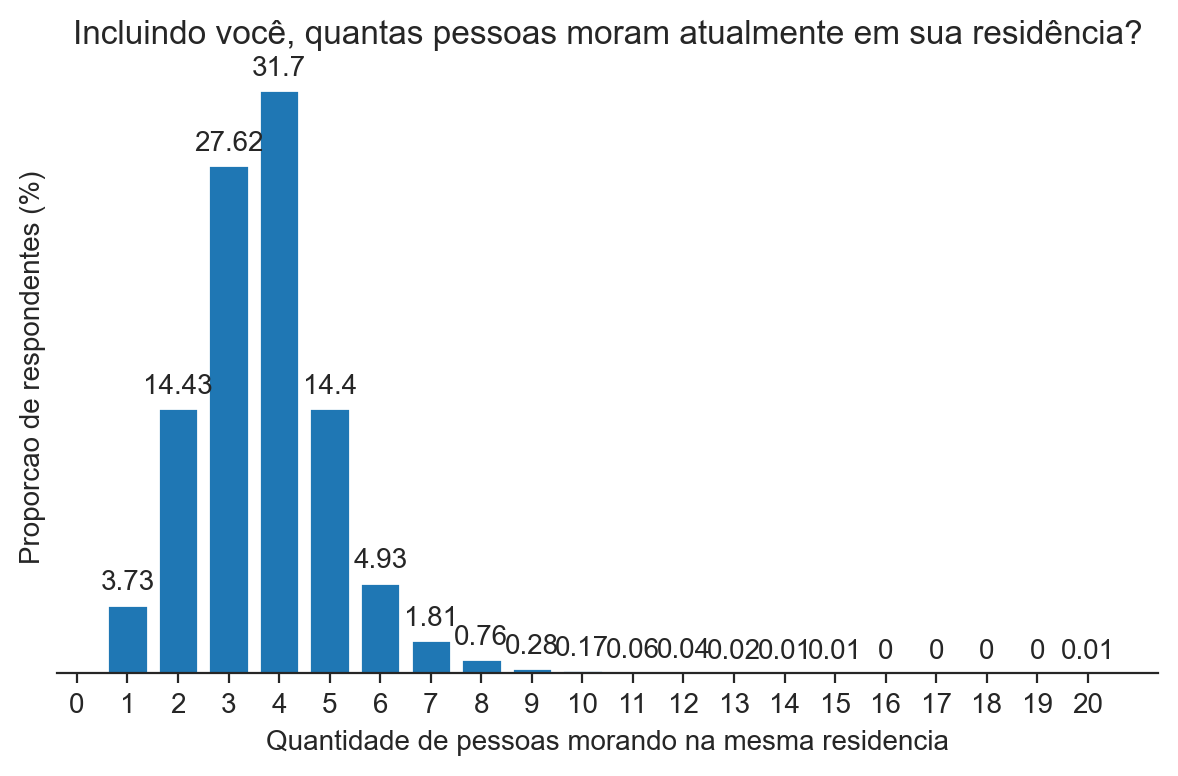

In [52]:
fig, ax = plt.subplots(figsize = (6,4))

ax.bar(pessoas_compar_residencia['Q005'], round(pessoas_compar_residencia['PROP'],2))
ax.set_xlabel('Quantidade de pessoas morando na mesma residencia')
ax.set_ylabel('Proporcao de respondentes (%)')
ax.set_title('Incluindo você, quantas pessoas moram atualmente em sua residência?')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks([])
ax.set_xticks(range(21))

plt.tight_layout()
plt.show()

- Em geral, as residencias possuem ate 5 moradores.
- 31.7% das residencias possuem 4 moradores, seguido pelas residencias com ate 3 moradores (27.6%)
- Residencias com 7 ou mais moradores apresentam menos de 2% dos respondentes para cada "classe"
- Avaliar o agrupamento das classes acima de 9 pessoas em uma unica.

In [53]:
# Q006 - Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.

renda_cat = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.320,00',
    'C': 'De R$ 1.320,01 até R$ 1.980,00',
    'D': 'De R$ 1.980,01 até R$ 2.640,00',
    'E': 'De R$ 2.640,01 até R$ 3.300,00',
    'F': 'De R$ 3.300,01 até R$ 3.960,00',
    'G': 'De R$ 3.960,01 até R$ 5.280,00',
    'H': 'De R$ 5.280,01 até R$ 6.600,00',
    'I': 'De R$ 6.600,01 até R$ 7.920,00',
    'J': 'De R$ 7.920,01 até R$ 9.240,00',
    'K': 'De R$ 9.240,01 até R$ 10.560,00',
    'L': 'De R$ 10.560,01 até R$ 11.880,00',
    'M': 'De R$ 11.880,01 até R$ 13.200,00',
    'N': 'De R$ 13.200,01 até R$ 15.840,00',
    'O': 'De R$ 15.840,01 até R$ 19.800,00',
    'P': 'De R$ 19.800,01 até R$ 26.400,00',
    'Q': 'Acima de R$ 26.400,00'
}

tabela_renda = data_tmp2['Q006'].map(renda_cat)
tabela_renda = tabela_renda.value_counts().reset_index()

tabela_renda.columns = ['Q006', 'QTDE']
tabela_renda['PROP'] = tabela_renda['QTDE']/tabela_renda['QTDE'].sum()*100

categories = list(renda_cat.values())

tabela_renda['Q006'] = pd.Categorical(
    tabela_renda['Q006'],
    categories=categories,
    ordered=True
)

tabela_renda = tabela_renda.sort_values('Q006', ascending=False)
tabela_renda


,Q006,QTDE,PROP
11,"Acima de R$ 26.400,00",51489,1.309
15,"De R$ 19.800,01 até R$ 26.400,00",38105,0.969
13,"De R$ 15.840,01 até R$ 19.800,00",41218,1.048
12,"De R$ 13.200,01 até R$ 15.840,00",41565,1.057
16,"De R$ 11.880,01 até R$ 13.200,00",33626,0.855
14,"De R$ 10.560,01 até R$ 11.880,00",39596,1.007
10,"De R$ 9.240,01 até R$ 10.560,00",59631,1.516
9,"De R$ 7.920,01 até R$ 9.240,00",75179,1.911
8,"De R$ 6.600,01 até R$ 7.920,00",85970,2.185
7,"De R$ 5.280,01 até R$ 6.600,00",139279,3.540


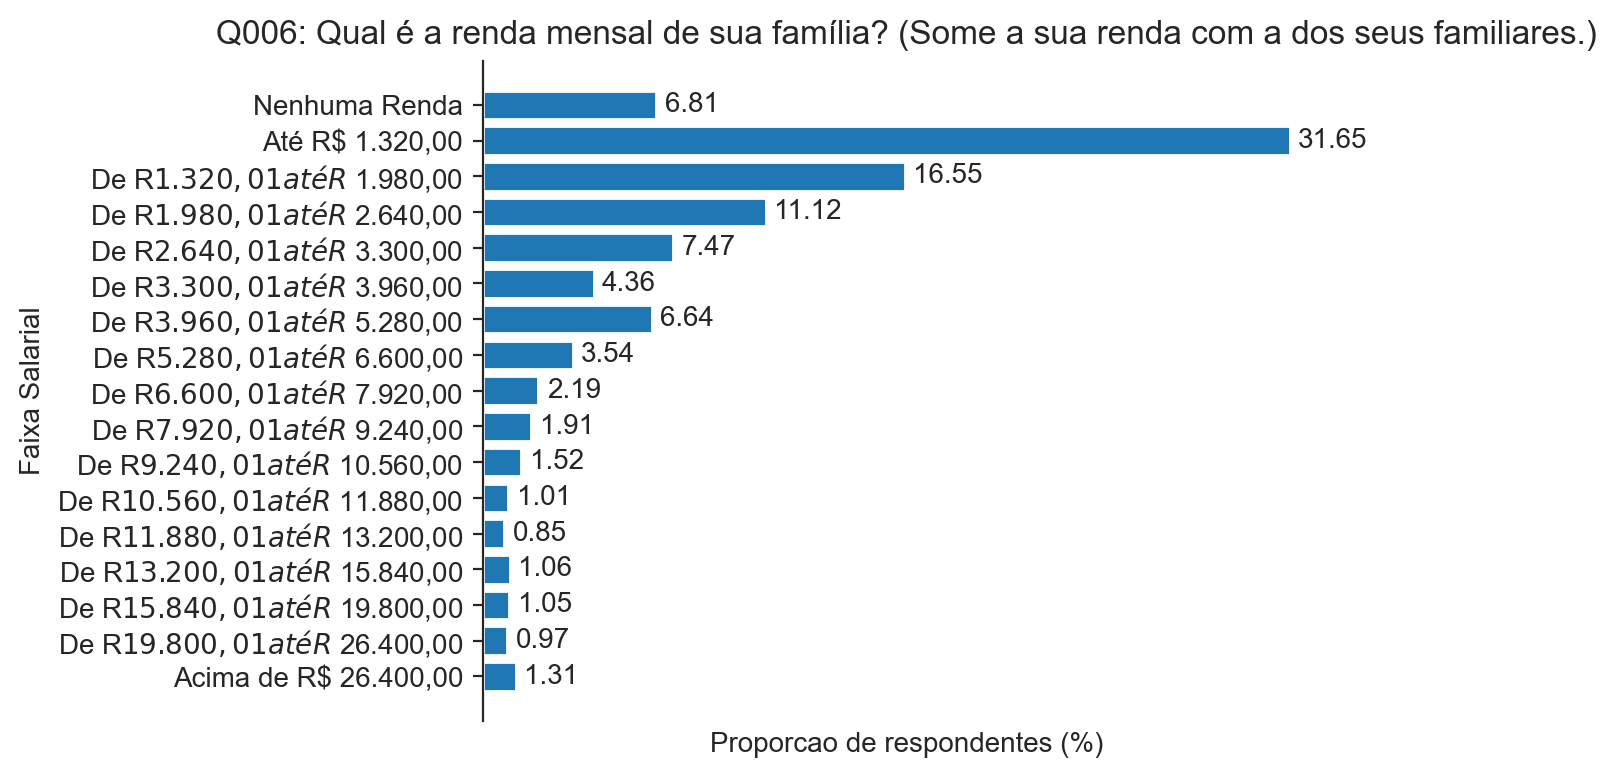

In [55]:
fig, ax = plt.subplots(figsize = (7,4))

ax.barh(tabela_renda['Q006'], round(tabela_renda['PROP'],2))
ax.set_xlabel('Proporcao de respondentes (%)')
ax.set_ylabel('Faixa Salarial')
ax.set_title('Q006: Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)')

for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', padding=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])

plt.tight_layout()
plt.show()

- A maior concentracao de participantes possui uma renda mensal de ate R$ 1.320. 
- Conforme o aumento da renda, temos um menor numero de participantes.
- 6.81% nao possuem renda mensal familiar.
- Avaliar usar o valor medio da classe como variavel ao inves de utilizar a categoria.

In [56]:
# Q007: Em sua residência trabalha empregado(a) doméstico(a)?

empregado_cat = {
    'A': 'Nao',
    'B': 'Sim, um ou dois dias por semana.',
    'C': 'Sim, três ou quatro dias por semana.',
    'D': 'Sim, pelo menos cinco dias por semana.'
}

tabela_empreg_domes = data_tmp2['Q007'].map(empregado_cat)
tabela_empreg_domes = tabela_empreg_domes.value_counts().reset_index()
tabela_empreg_domes.columns = ['Q007', 'QTDE']

tabela_empreg_domes['PROP'] = tabela_empreg_domes['QTDE']/tabela_empreg_domes['QTDE'].sum()*100
tabela_empreg_domes

,Q007,QTDE,PROP
0,Nao,3611179,91.795
1,"Sim, um ou dois dias por semana.",178524,4.538
2,"Sim, pelo menos cinco dias por semana.",104370,2.653
3,"Sim, três ou quatro dias por semana.",39882,1.014


In [57]:
# Q008: Na sua residência tem banheiro?
# Q009: Na sua residência tem quartos para dormir?
# Q010: Na sua residência tem carro?
# Q011: Na sua residência tem motocicleta?
# Q012: Na sua residência tem geladeira?
# Q013: Na sua residência tem freezer (independente ou segunda porta da geladeira)?
# Q014: Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)
# Q015: Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?
# Q016: Na sua residência tem forno micro-ondas?
# Q017: Na sua residência tem máquina de lavar louça?
# Q019: Na sua residência tem televisão em cores?
# Q022: Na sua residência tem telefone celular?
# Q024: Na sua residência tem computador?


perguntas_categorias = {
    'A': 'Nao',
    'B': 'Sim, uma',
    'C': 'Sim, duas',
    'D': 'Sim, tres',
    'E': 'Sim, quatro ou mais'
}

categories = list(perguntas_categorias.values())

- 91.8% dos participantes nao possuem empregado(a) domestico(a) em casa.
- 2.65% possuem por cinco ou mais dias na semana.

In [58]:

colunas = ['Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q019','Q022', 'Q024']

tabela_perguntas = data_tmp2[colunas]

In [59]:
tabela_perguntas_map = tabela_perguntas.applymap(lambda x: perguntas_categorias.get(x, 'Categoria Desconhecida'))

tabela_perguntas_map

,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q019,Q022,Q024
0,"Sim, duas","Sim, tres","Sim, duas","Sim, tres","Sim, duas","Sim, uma","Sim, uma","Sim, tres","Sim, duas","Sim, duas","Sim, uma","Sim, uma",Nao
1,"Sim, uma","Sim, duas","Sim, duas",Nao,"Sim, uma","Sim, uma","Sim, uma",Nao,"Sim, uma",Nao,"Sim, uma","Sim, duas","Sim, tres"
2,"Sim, uma","Sim, tres","Sim, uma",Nao,"Sim, uma",Nao,"Sim, uma",Nao,"Sim, uma",Nao,"Sim, uma",Nao,Nao
3,"Sim, uma","Sim, uma",Nao,Nao,"Sim, uma",Nao,Nao,Nao,Nao,Nao,"Sim, uma","Sim, tres",Nao
4,"Sim, uma",Nao,Nao,Nao,"Sim, uma",Nao,Nao,Nao,Nao,Nao,"Sim, uma","Sim, uma",Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933950,"Sim, uma","Sim, tres","Sim, uma","Sim, uma","Sim, uma",Nao,"Sim, uma","Sim, uma","Sim, uma",Nao,"Sim, duas","Sim, quatro ou mais",Nao
3933951,"Sim, quatro ou mais","Sim, tres","Sim, duas",Nao,"Sim, uma","Sim, uma","Sim, uma",Nao,"Sim, uma",Nao,"Sim, duas","Sim, uma","Sim, duas"
3933952,"Sim, uma","Sim, duas",Nao,Nao,"Sim, uma",Nao,Nao,Nao,Nao,Nao,"Sim, uma","Sim, uma",Nao
3933953,"Sim, quatro ou mais","Sim, tres","Sim, duas",Nao,"Sim, duas","Sim, uma","Sim, uma",Nao,"Sim, uma","Sim, uma","Sim, duas","Sim, tres","Sim, duas"


In [60]:
tabela_melted = tabela_perguntas_map.melt(var_name='Pergunta', value_name='Categoria')
tabela_melted = tabela_melted.groupby(['Categoria', 'Pergunta']).size().reset_index(name = 'Quantidade')

tabela_melted['Categoria'] = pd.Categorical(
    tabela_melted['Categoria'],
    categories=categories,
    ordered=True
)

tabela_melted

,Categoria,Pergunta,Quantidade
0,Nao,Q008,37878
1,Nao,Q009,34469
2,Nao,Q010,2167356
3,Nao,Q011,2983690
4,Nao,Q012,75430
...,...,...,...
60,"Sim, uma",Q016,1838403
61,"Sim, uma",Q017,127927
62,"Sim, uma",Q019,2607933
63,"Sim, uma",Q022,764861


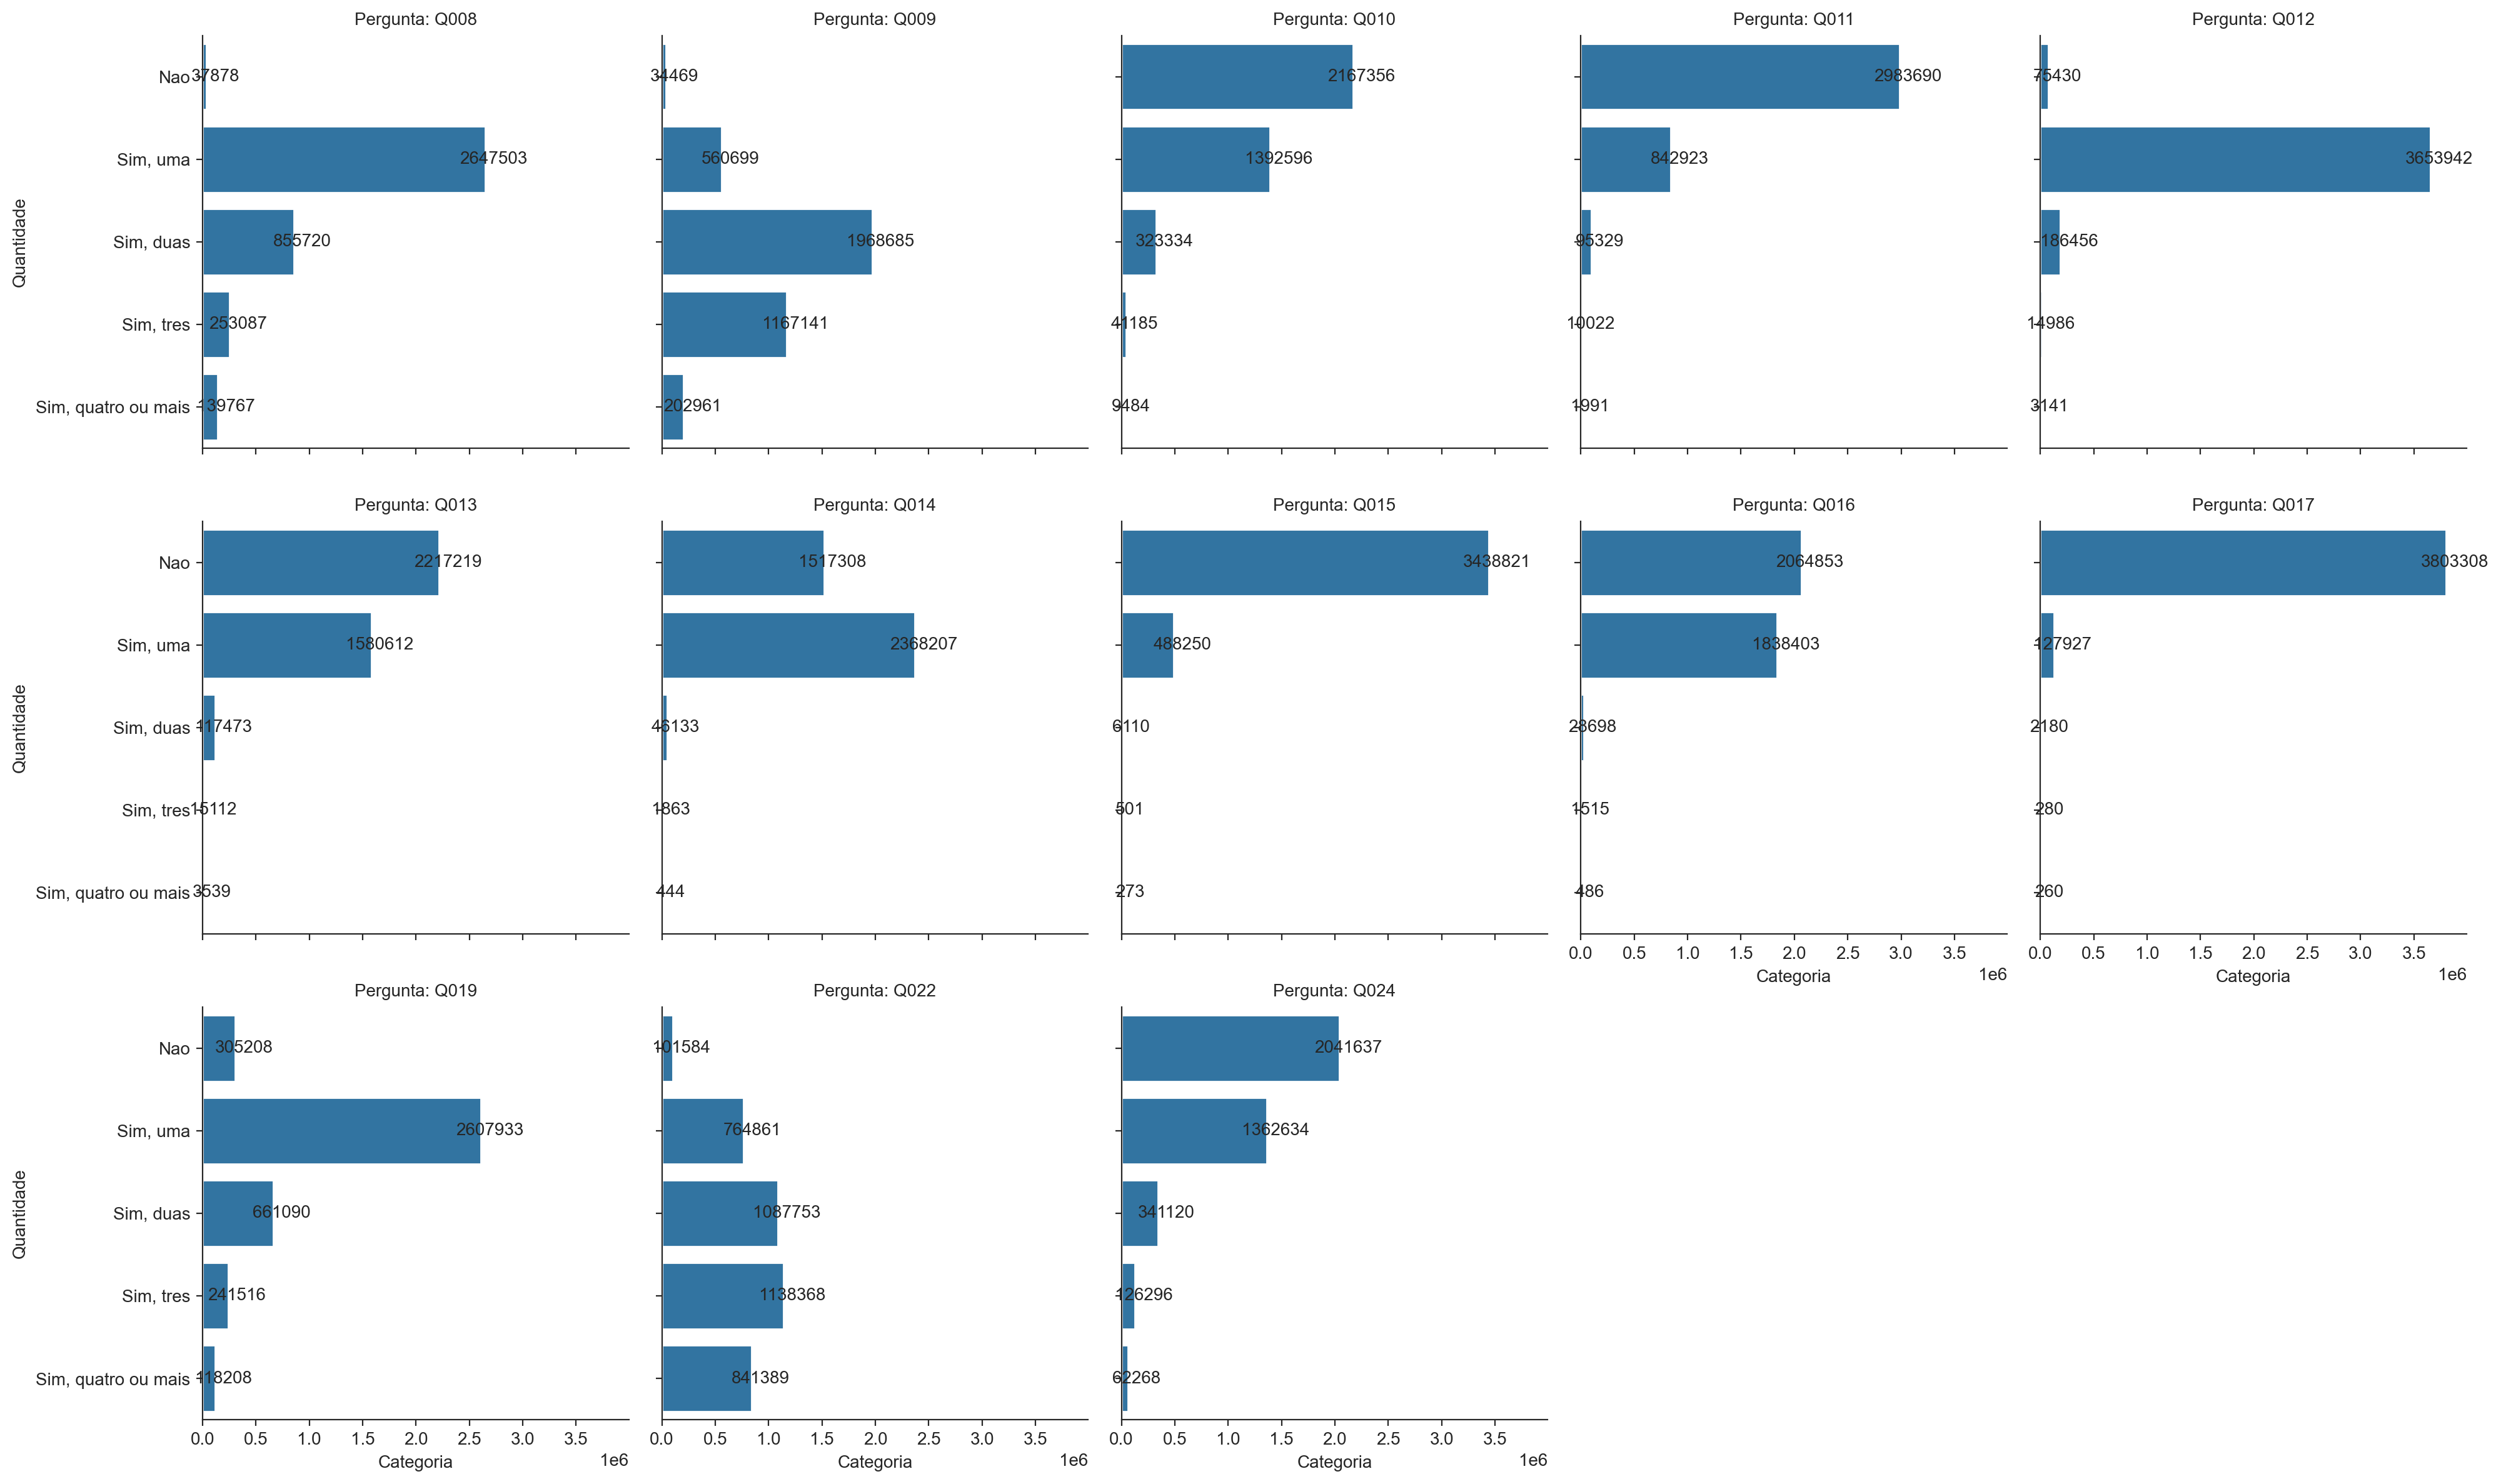

In [61]:
# Barplots


# Definir o número de colunas e linhas
num_colunas = 5
num_perguntas = tabela_melted['Pergunta'].nunique()
num_linhas = -(-num_perguntas // num_colunas)  # Divisão inteira arredondando para cima

# Criar gráficos de barras em uma grade de subplots usando catplot
g = sns.catplot(
    y='Categoria', 
    x='Quantidade', 
    col='Pergunta', 
    data=tabela_melted, 
    kind='bar', 
    col_wrap=num_colunas,
    height=4,
    aspect=1
)

# Adicionar labels nas barras
for ax in g.axes.flat:
    for p in ax.patches:
        width = p.get_width()
        if not pd.isna(width):  # Adicionar checagem para valores NaN
            ax.annotate(f'{int(width)}', 
                        (width, p.get_y() + p.get_height() / 2.), 
                        ha='center', va='center', xytext=(5, 0), 
                        textcoords='offset points')

# Ajustar os títulos e os rótulos
g.set_titles("Pergunta: {col_name}")
g.set_axis_labels("Categoria", "Quantidade")
# g.set_xticklabels(rotation=45)

plt.tight_layout()
plt.show()

- Q008 - Maior parcela dos participantes possuem um banheiro em casa. Embora seja um valor pequeno, ainda existem residencias sem banheiro, o que e preocupante.
- Q009 - Maioria dos participantes com 2 quartos para dormir em casa, seguido de 3 quartos.
- Q010 e Q011 - Maior parcela para residencias sem carros e sem moto.
- Q012 - Residencias com apenas uma geladeira sao predominantes.
- Q013 - Em relacao ao Freezer, a maior parcela das residencias nao possui, mas o numero de residencias que possui apenas uma e proximo.
- Q014 - Predominancia de uma maquina de lavar roupa, seguido de nenhuma.
- Q015 - A maquina de secar roupa ainda e pouco vista nas residencias (existe, alem de atributos financeiros, atributos culturais que ajudam a explicar esse numero)
- Q016 - O micro-ondas ainda nao esta presente na maior parcela das residencias.
- Q017 - A maquina de lavar loucas e um item pouco presente nas residencias
- Q019 - As casas possuem, em sua maioria, apenas uma TV em cores.
- Q022 - Em relacao ao telefone celular, comparado com os demais itens, e distribuicao e mais uniforme em relacao ao numero de celulares por residencia.
- Q023 - A maioria das casas nao possuem computador, seguido por apenas um.


In [62]:
# Q018: Na sua residência tem aspirador de pó?
# Q020: Na sua residência tem aparelho de DVD?
# Q021: Na sua residência tem TV por assinatura?
# Q023: Na sua residência tem telefone fixo?
# Q025: Na sua residência tem acesso à Internet?

perguntas_categorias2 = {
    'A': 'Nao',
    'B': 'Sim'
}

colunas = ['Q018', 'Q020', 'Q021', 'Q023', 'Q025']

In [63]:
dados_colunas = data_tmp2[colunas]
dados_colunas_map = dados_colunas.applymap(lambda x: perguntas_categorias2.get(x, 'Categoria Desconhecida'))

dados_colunas_map

,Q018,Q020,Q021,Q023,Q025
0,Sim,Nao,Sim,Nao,Sim
1,Sim,Nao,Nao,Nao,Sim
2,Nao,Nao,Nao,Nao,Sim
3,Nao,Nao,Nao,Nao,Sim
4,Nao,Nao,Nao,Nao,Nao
...,...,...,...,...,...
3933950,Nao,Nao,Sim,Nao,Sim
3933951,Sim,Sim,Sim,Sim,Sim
3933952,Nao,Nao,Nao,Nao,Sim
3933953,Sim,Nao,Nao,Nao,Sim


In [64]:
dados_colunas_melted = dados_colunas_map.melt(var_name='Pergunta', value_name='Categoria')
dados_colunas_melted = dados_colunas_melted.groupby(['Categoria', 'Pergunta']).size().reset_index(name = 'Quantidade')

dados_colunas_melted = dados_colunas_melted.pivot_table(index = 'Categoria', columns='Pergunta', values='Quantidade')
dados_colunas_melted_prop = dados_colunas_melted.div(dados_colunas_melted.sum(axis=0), axis=1) * 100
dados_colunas_melted_prop


Pergunta,Q018,Q020,Q021,Q023,Q025
Categoria,,,,,
Nao,77.078,87.204,78.801,90.993,9.545
Sim,22.922,12.796,21.199,9.007,90.455


- 77% das residencias nao possuem aspirador de po.
- 87% das residencias nao possuem aparelho de DVD. (Seria interessante o INEP atualizar esta pergunta)
- 78% das residencias nao possuem TV por assinatura.
- 90% das residencias nao possuem telefone fixo. (achei estranho. Seria interessante entender mais sobre esse numero)
- 90% das residencias possuem acesso a internet.